<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/Sentimate_analysis_CountVectorizer_vs_TfidfVectorizer_LR_vs_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

In [4]:
dataset=pd.read_csv('Dataset-SA.csv')

In [5]:
dataset

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


<Axes: xlabel='count', ylabel='Sentiment'>

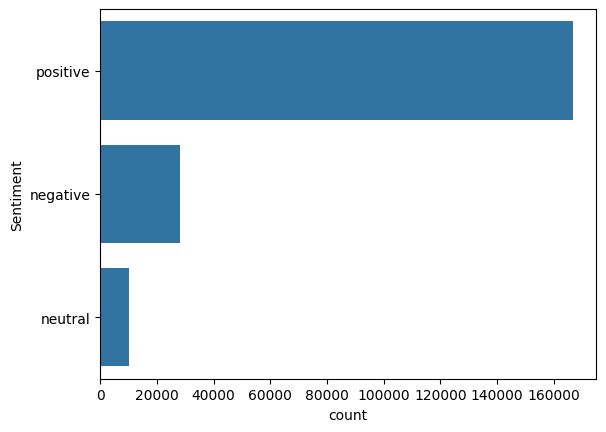

In [226]:
sns.countplot(dataset['Sentiment']). #postive class is dominent

In [13]:
dataset.isnull().sum()


product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [40]:
dataset['text'] = dataset['Summary'] + ' ' + dataset['product_name'] ##Combining both features so that we dont get Found input variables with inconsistent numbers of samples: [2, 164041] error while fitting in the model

In [56]:
dataset['text'] = dataset['text'].fillna('') ##filling missing values using fillna(),can use dummpy varibles as well as simpleimputer

In [57]:
X=dataset['text']

In [58]:
X

0         great cooler excellent air flow and for this p...
1         best budget 2 fit cooler nice cooling Candes 1...
2         the quality is good but the power of air is de...
3         very bad product its a only a fan Candes 12 L ...
4         ok ok product Candes 12 L Room/Personal Air Co...
                                ...                        
205047    good product cello Pack of 18 Opalware Cello D...
205048    nice cello Pack of 18 Opalware Cello Dazzle Lu...
205049    very nice and fast delivery cello Pack of 18 O...
205050    awesome product cello Pack of 18 Opalware Cell...
205051    very good but mixing bowl not included is one ...
Name: text, Length: 205052, dtype: object

In [195]:
X[1]

'best budget 2 fit cooler nice cooling Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)'

In [59]:
y=dataset['Sentiment']

In [60]:
y

0         positive
1         positive
2         positive
3         negative
4          neutral
            ...   
205047    positive
205048    positive
205049    positive
205050    positive
205051     neutral
Name: Sentiment, Length: 205052, dtype: object

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [62]:
y #0=negative,1=neutral,2=positive

array([2, 2, 2, ..., 2, 2, 1])

In [63]:
X_input_train,X_input_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [64]:
len(X_input_train)

164041

In [65]:
len(y_train)

164041

# LogisticRegression_countvectorizer_word_tokenizer

In [108]:
vectorizer=CountVectorizer(analyzer='word')

In [109]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr=LogisticRegression(max_iter=4000)

In [112]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [113]:
lr_test=lr.score(X_test,y_test)

In [114]:
lr_train=lr.score(X_train,y_train)

In [115]:
model_result=(['LR Word',lr_test,lr_train])

In [116]:
model_result

['LR Word', 0.9305064494891614, 0.9546454849702208]

In [117]:
y_lr=lr.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_lr, normalize='true')
cm

array([[0.83230904, 0.03705004, 0.13064091],
       [0.17372047, 0.48425197, 0.34202756],
       [0.01577334, 0.00967432, 0.97455234]])

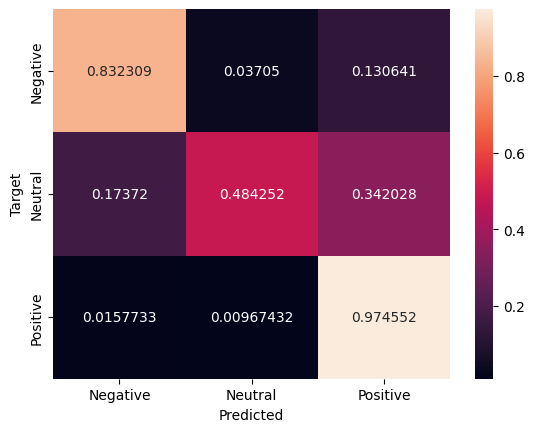

In [119]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [120]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_lr))


              precision    recall  f1-score   support

           0       0.84      0.83      0.84      5695
           1       0.65      0.48      0.55      2032
           2       0.96      0.97      0.97     33284

    accuracy                           0.93     41011
   macro avg       0.82      0.76      0.79     41011
weighted avg       0.93      0.93      0.93     41011



In [122]:
lr.coef_

array([[-0.22444385,  0.0321283 ,  0.07019472, ...,  0.23890882,
        -0.34273167, -0.03147656],
       [ 0.03713954, -0.00250311, -0.00075619, ...,  0.2197391 ,
         0.18266753, -0.00792324],
       [ 0.1873043 , -0.02962519, -0.06943853, ..., -0.45864792,
         0.16006414,  0.0393998 ]])

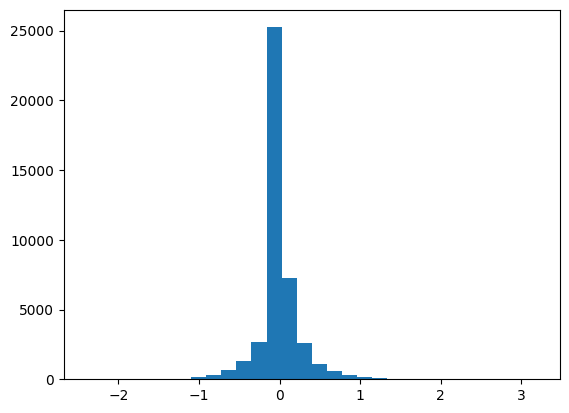

In [130]:
plt.hist(lr.coef_[2],bins=30);

In [131]:
word_index_map=vectorizer.vocabulary_
word_index_map

{'gifted': 16900,
 'this': 38083,
 'to': 38614,
 'my': 25040,
 'mother': 24751,
 'on': 26328,
 'mothers': 24754,
 'day': 11224,
 'and': 4175,
 'she': 34342,
 'loved': 22701,
 'the': 37863,
 'design': 11937,
 'color': 9436,
 'as': 4631,
 'well': 41299,
 'thank': 37788,
 'you': 42397,
 'flipkart': 15698,
 'np2598wm03': 25889,
 'analog': 4157,
 'watch': 40996,
 'for': 16077,
 'women': 41740,
 'worst': 41999,
 'product': 29724,
 'do': 12735,
 'not': 25747,
 'buy': 7698,
 'it': 20428,
 'very': 40424,
 'cheap': 8700,
 'quality': 31009,
 'rian': 32701,
 'animal': 4214,
 'single': 34731,
 'mink': 23979,
 'blanket': 6718,
 'mild': 23898,
 'winterpolyester': 41642,
 'brown': 7417,
 'grey': 17822,
 'poor': 28740,
 'shf': 34380,
 'velvet': 40333,
 'door': 12820,
 'matmulticolor': 23429,
 'large': 21774,
 'pack': 27154,
 'of': 26044,
 'good': 17101,
 'printing': 29480,
 'outputsmooth': 26957,
 'hp': 19178,
 '46': 2009,
 'black': 6679,
 'ink': 19844,
 'cartridge': 8259,
 'there': 37927,
 'is': 20299

In [132]:
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():  ### We to coef_[2] because we have postive=2(when converted into numerical)
    weight = lr.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
loved 2.4395398986415437
well 1.2321386419559222
thank 1.8772271269305338
good 2.2179501522056766
best 2.5026641163148784
fab 1.0216828245800977
nice 2.8901628434492466
flexible 1.6079126332260538
value 1.7631476338595407
easy 1.2622920707109664
super 3.1977327700840075
excellent 2.768257809585471
useful 1.9858311775281248
helpful 1.7841599870646427
amezing 1.490851291002787
superb 2.469071298169596
suparb 1.0084465461873058
better 1.4659628138249363
perfect 1.9296104466609614
satisfied 1.5173902672949322
commitment 1.1840939973955338
like 1.1853708613543477
awesome 2.7016975318255056
happy 1.8415918559289193
thanks 2.620951380904075
support 1.1170211287802652
comfortable 1.6443526497636625
worth 1.6242228890574266
love 2.631294890716436
thermosteel 1.1010882185028372
strong 1.0715984458842773
cool 1.9682239966646973
120 1.0250564286959292
clean 1.023328954040311
wow 2.3552758015975175
amazing 2.6504352116592087
please 1.0069877856071312
nyc 2.005847202121756
veget

In [133]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
worst -1.3388816223158084
not -2.167892385151644
poor -1.5876664226348178
no -1.0184690914055692
doesnt -1.7281368818331273
average -1.2240896230605969
finish -1.104174105245259
upset -1.6334721444100966
session -1.397369693967398
mam -1.3884548171633222
pin -1.0955575349353883
broke -1.8115159789654252
never -1.0627809020231551
25w -1.0581084046655678
elv -1.2091874937302114
rockerz -1.1227618570533473
pearl -1.147115847266016
plush -1.3814597774907578
difficult -2.401529720909509
lost -1.3511446565650103
useless -1.0437694640164592
sad -1.1709103013359377
disappointing -2.0755085935147957
problem -1.0350032596415848
disappointed -1.2167863449742438
damaged -1.7939909605824043
broken -2.144281897006379
damage -1.098016517252663
slow -1.04776818416471
hard -1.0156073516678321
stopped -1.1468155965874005
dirty -1.9253293259570772
prep_ -1.592702608010339
dead -1.0312172418029701
damages -1.1483089116696346
adds -1.7233412853037466
screws -1.5490956355813228
pollutio

# LogisticRegression_countvectorizer_char_tokenizer

In [273]:
vectorizer=CountVectorizer(analyzer='char')

In [274]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [275]:
lr2=LogisticRegression(max_iter=4000)

In [276]:
lr2.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [277]:
lr2_test=lr2.score(X_test,y_test)

In [278]:
lr2_train=lr2.score(X_train,y_train)

In [279]:
model_result=(['LR Word',lr_test,lr_train],
              ['LR Char',lr2_test,lr2_train])

In [280]:
model_result

(['LR Word', 0.9305064494891614, 0.9546454849702208],
 ['LR Char', 0.8090999975616298, 0.8108521650075287])

In [281]:
y_lr2=lr2.predict(X_test)

In [282]:
cm = confusion_matrix(y_test, y_lr2, normalize='true')
cm

array([[2.96751536e-02, 0.00000000e+00, 9.70324846e-01],
       [8.85826772e-03, 4.92125984e-04, 9.90649606e-01],
       [8.14205023e-03, 3.00444658e-05, 9.91827905e-01]])

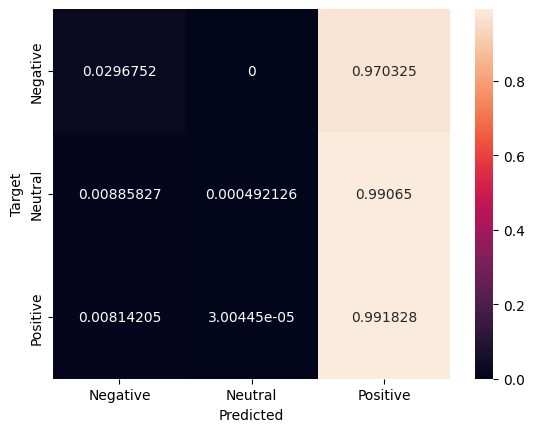

In [283]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [284]:


print(classification_report(y_test, y_lr2))


              precision    recall  f1-score   support

           0       0.37      0.03      0.05      5695
           1       0.50      0.00      0.00      2032
           2       0.81      0.99      0.89     33284

    accuracy                           0.81     41011
   macro avg       0.56      0.34      0.32     41011
weighted avg       0.74      0.81      0.73     41011



In [285]:
lr2.coef_

array([[-1.14638130e-03, -7.56354984e-02,  8.19368361e-02,
        -1.87366616e-01,  1.18081953e-01,  6.84628321e-02,
         6.84628321e-02, -2.68771647e-01,  2.61895246e-02,
         6.12125878e-02, -6.54827838e-03,  6.70907698e-02,
        -1.48404605e-02, -3.53889228e-02, -1.53202174e-02,
        -1.19990130e-01,  2.33792411e-02,  1.24960605e-02,
         1.39040379e-03, -1.69892221e-02, -6.98043366e-03,
        -1.67846880e-02,  3.58379202e-01,  8.65045614e-03,
         2.15581121e-01,  2.15581121e-01,  5.44953035e-01,
        -2.63486038e-02,  5.06377311e-02, -2.57918574e-03,
         2.17081141e-02, -1.41134732e-02, -7.61319739e-03,
        -4.94815005e-02, -2.47011798e-03, -5.11000037e-02,
         3.84876334e-02, -6.73957584e-02, -3.63974100e-03,
         2.41044813e-02,  5.89985429e-02,  1.42286126e-03,
         2.93928627e-02,  3.68909384e-01,  4.00430464e-02,
         5.92552701e-04,  3.87690208e-02, -6.75693962e-02,
        -6.28039189e-03,  4.14371610e-02, -9.61618044e-0

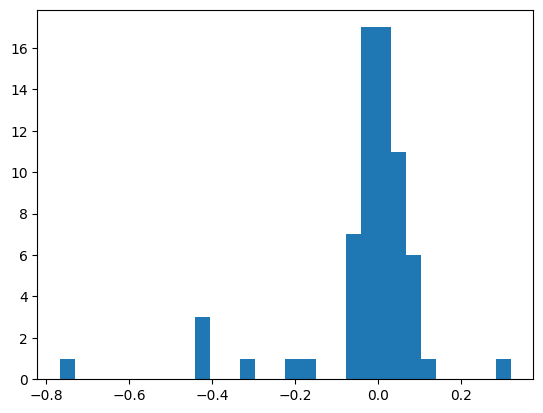

In [286]:
plt.hist(lr2.coef_[2], bins=30);

In [287]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'i': 35,
 ' ': 0,
 'g': 33,
 'f': 32,
 't': 46,
 'e': 31,
 'd': 30,
 'h': 34,
 's': 45,
 'o': 41,
 'm': 39,
 'y': 51,
 'r': 44,
 'n': 40,
 'a': 27,
 'l': 38,
 'v': 48,
 'c': 29,
 'w': 49,
 'k': 37,
 'u': 47,
 'p': 42,
 '2': 14,
 '5': 17,
 '9': 21,
 '8': 20,
 '0': 12,
 '3': 15,
 '-': 9,
 'b': 28,
 'q': 43,
 '4': 16,
 '6': 18,
 'x': 50,
 '7': 19,
 '?': 23,
 '(': 5,
 ')': 6,
 '1': 13,
 'z': 52,
 ',': 8,
 'ã': 62,
 '\x82': 54,
 'â': 61,
 '\xa0': 59,
 'j': 36,
 'ð': 63,
 '\x93': 57,
 'ó': 66,
 '®': 60,
 '\x92': 56,
 'ò': 65,
 '|': 53,
 ':': 22,
 '.': 10,
 '&': 3,
 '/': 11,
 '\x9d': 58,
 '+': 7,
 "'": 4,
 '_': 26,
 '%': 2,
 '[': 24,
 ']': 25,
 '"': 1,
 'ñ': 64,
 '\x91': 55}

In [288]:
threshold = 0.0


print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr2.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
i 0.02207368771111649
g 0.06743986532605535
f 0.019591222240162753
e 0.021311350293698017
d 0.03736751537546633
h 0.0060103713612815034
y 0.034321716575992756
a 0.007988248245822551
v 0.0016455915805184372
c 0.052613229395741985
u 0.07346909897823921
p 0.03495883375376876
2 0.03464215226389399
9 0.058579605128857425
8 0.027921420547477885
0 0.042525779873951064
3 0.09179854308542187
x 0.008920907218965001
7 0.07664412069469592
? 0.013023618902924082
1 0.015757047790797653
z 0.009646836257428688
ã 0.03907063006344011
 0.03907063006344011
ð 0.0343980290078339
ó 0.06894799334890718
® 0.06894799334890718
 0.01980639297875488
| 0.01507635031094745
. 0.042343641831929235
 0.0056460860124782405
+ 0.31926102493675945
" 0.11208642561459516


In [289]:
threshold = 0
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr2.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
  -0.005955317562244237
t -0.0516795825862742
s -0.017123695893010934
o -0.00889171183844576
m -0.03331720333987173
r -0.020315630743774495
n -0.03211343841598271
l -0.0012371849884542274
w -0.01723716015986227
k -0.058543407544315806
5 -0.018933346763632515
- -0.020099613916096295
b -0.07218629992324044
q -0.19375528380606186
4 -0.028848884738630336
6 -0.06395161441785485
( -0.008008878134590964
) -0.008008878134590964
, -0.036651067770305606
â -0.02273500316041434
  -0.02273500316041434
j -0.012933157014362848
 -0.03976472129078698
ò -0.04871027130739876
: -0.32095383037678626
& -0.00019783280500579152
/ -0.022705954063958235
' -0.1556530061341371
_ -0.7666076977421205
% -0.41641273882046936
[ -0.41915153649375814
] -0.41915153649375814
ñ -0.05478768638258824
 -0.05478768638258824


# Multinomial_countvectorizer_word_tokenizer

In [164]:
vectorizer=CountVectorizer(analyzer='word')

In [165]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [166]:
from sklearn.naive_bayes import MultinomialNB

In [167]:
nb=MultinomialNB()

In [168]:
nb.fit(X_train,y_train)

MultinomialNB()

In [171]:
nb_test=nb.score(X_test,y_test)

In [173]:
nb_train=nb.score(X_train,y_train)

In [174]:
model_result=(['LR Word Count_Vec',lr_test,lr_train],
              ['LR Char Count_Vec',lr2_test,lr2_train],
              ['NB Word Count_Vec',nb_test,nb_train])

In [175]:
model_result

(['LR Word Count_Vec', 0.9305064494891614, 0.9546454849702208],
 ['LR Char Count_Vec', 0.8090999975616298, 0.8108521650075287],
 ['NB Word Count_Vec', 0.8408719611811465, 0.8465139812607824])

In [176]:
y_nb=nb.predict(X_test)

In [177]:
cm = confusion_matrix(y_test, y_nb, normalize='true')
cm

array([[0.68481124, 0.03353819, 0.28165057],
       [0.23720472, 0.23179134, 0.53100394],
       [0.07874654, 0.01649441, 0.90475904]])

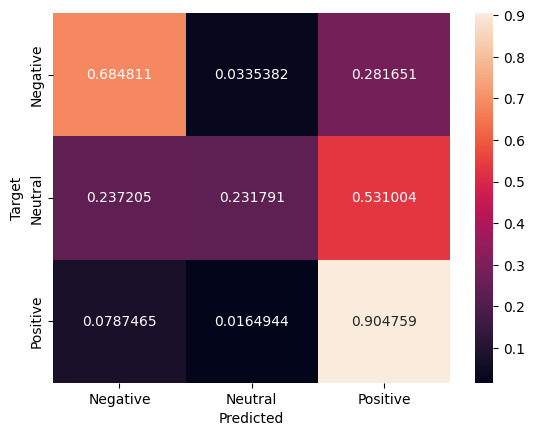

In [178]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [179]:
print(classification_report(y_test,y_nb))

              precision    recall  f1-score   support

           0       0.56      0.68      0.61      5695
           1       0.39      0.23      0.29      2032
           2       0.92      0.90      0.91     33284

    accuracy                           0.84     41011
   macro avg       0.62      0.61      0.61     41011
weighted avg       0.84      0.84      0.84     41011



In [181]:
nb.feature_log_prob_  #### MultinomialNB does not have coef_ instead it has feature_log_prob_

array([[-10.13707816, -12.53497343, -12.53497343, ..., -10.33774886,
        -13.22812061, -13.22812061],
       [-10.35418093, -12.1459404 , -12.1459404 , ..., -11.04732811,
        -11.45279322, -12.1459404 ],
       [ -9.91120114, -14.77101354, -14.77101354, ..., -10.61213046,
        -12.691572  , -14.07786636]])

(array([7.5810e+03, 2.0522e+04, 4.3390e+03, 1.5530e+03, 1.6250e+03,
        1.1420e+03, 7.5700e+02, 5.6900e+02, 5.7400e+02, 4.4800e+02,
        4.1100e+02, 5.2400e+02, 3.4800e+02, 3.9300e+02, 3.2400e+02,
        3.0200e+02, 2.3400e+02, 1.9800e+02, 1.4900e+02, 2.2600e+02,
        1.2900e+02, 6.4000e+01, 5.1000e+01, 3.5000e+01, 1.3000e+01,
        7.0000e+00, 7.0000e+00, 5.0000e+00, 6.0000e+00, 2.0000e+00]),
 array([-14.77101354, -14.40413164, -14.03724974, -13.67036784,
        -13.30348594, -12.93660404, -12.56972214, -12.20284024,
        -11.83595834, -11.46907644, -11.10219454, -10.73531264,
        -10.36843074, -10.00154884,  -9.63466694,  -9.26778504,
         -8.90090314,  -8.53402124,  -8.16713934,  -7.80025744,
         -7.43337554,  -7.06649364,  -6.69961174,  -6.33272984,
         -5.96584794,  -5.59896604,  -5.23208414,  -4.86520224,
         -4.49832034,  -4.13143844,  -3.76455654]),
 <BarContainer object of 30 artists>)

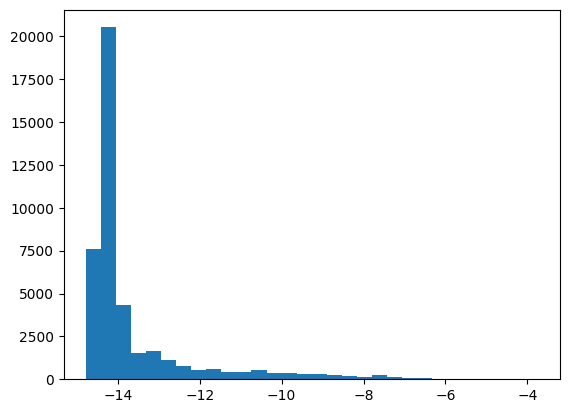

In [183]:
plt.hist(nb.feature_log_prob_[2] , bins=30)

In [184]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'gifted': 16900,
 'this': 38083,
 'to': 38614,
 'my': 25040,
 'mother': 24751,
 'on': 26328,
 'mothers': 24754,
 'day': 11224,
 'and': 4175,
 'she': 34342,
 'loved': 22701,
 'the': 37863,
 'design': 11937,
 'color': 9436,
 'as': 4631,
 'well': 41299,
 'thank': 37788,
 'you': 42397,
 'flipkart': 15698,
 'np2598wm03': 25889,
 'analog': 4157,
 'watch': 40996,
 'for': 16077,
 'women': 41740,
 'worst': 41999,
 'product': 29724,
 'do': 12735,
 'not': 25747,
 'buy': 7698,
 'it': 20428,
 'very': 40424,
 'cheap': 8700,
 'quality': 31009,
 'rian': 32701,
 'animal': 4214,
 'single': 34731,
 'mink': 23979,
 'blanket': 6718,
 'mild': 23898,
 'winterpolyester': 41642,
 'brown': 7417,
 'grey': 17822,
 'poor': 28740,
 'shf': 34380,
 'velvet': 40333,
 'door': 12820,
 'matmulticolor': 23429,
 'large': 21774,
 'pack': 27154,
 'of': 26044,
 'good': 17101,
 'printing': 29480,
 'outputsmooth': 26957,
 'hp': 19178,
 '46': 2009,
 'black': 6679,
 'ink': 19844,
 'cartridge': 8259,
 'there': 37927,
 'is': 20299

In [190]:
threshold = -6 #-14


print("Most positive words:")
for word, index in word_index_map.items():
    weight = nb.feature_log_prob_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
this -5.14677703585525
to -5.227850441325215
and -4.3920685089531215
the -4.77380798500757
color -5.820480705127068
you -5.950904896908842
flipkart -5.502687320242613
for -4.086757200893553
product -4.138119205701065
it -4.844786501911832
very -4.519795931424396
quality -5.150220519822064
grey -5.726019622029259
pack -4.701376159087232
of -4.393281365378332
good -3.764556539771803
black -4.268250023931447
is -4.515496819862484
best -5.658396257969882
men -4.983610467902123
nice -4.3969287858353745
cello -5.357977253396163
18 -5.195127685334347
opalware -5.4130293275287045
dinner -5.394142298553636
set -5.5592741485275585
white -5.03807709007636
microwave -5.859483599680891
home -5.910230645611135
price -5.990226073078521
super -5.815307387846847
with -4.42072701728018
smart -5.937842408394584
blue -5.2742919427225345
inch -5.766959603689054
but -5.845160350996528
in -5.111701673023962
its -5.6708229129422545
tv -5.845958117293327
gb -5.385292310326644
bluetooth -5.

In [193]:
threshold = -4
print("Most negative words:")
for word, index in word_index_map.items():
    weight = nb.feature_log_prob_[2][index]
    if weight < -threshold:
        print(word, weight)

Streaming output truncated to the last 5000 lines.
kitta -14.77101354141745
indha -14.77101354141745
kuppaya -14.77101354141745
vangradhukaa -14.77101354141745
camerareally -14.077866360857504
bepok -14.077866360857504
completelybest -14.077866360857504
15litres -14.077866360857504
labtop -14.077866360857504
maxxxxx -14.077866360857504
thenkyou -14.077866360857504
innovations -14.077866360857504
awsomemainly -14.077866360857504
cois -14.077866360857504
tripura -14.077866360857504
glipiart -14.077866360857504
ratewhich -14.077866360857504
buyinghappy -14.077866360857504
product100worth -14.077866360857504
pricegrow -14.077866360857504
peoplethis -14.077866360857504
buisnessthis -14.077866360857504
suetable -14.77101354141745
eaxctly -14.77101354141745
dreamed -14.077866360857504
1nt -14.077866360857504
bassspeaker -13.67240125274934
wellinstallation -14.077866360857504
karthik -13.67240125274934
enjoyable3 -14.077866360857504
etccons -14.077866360857504
switch2 -14.077866360857504
besr 

# We can see that using Multinomial Nb is not that effective as Logistic Regression as the words we optained does not make sense

# LogisticRegression_Tfidfvectorizer_word_tokenizer

In [196]:
vectorizer=TfidfVectorizer(analyzer='word')

In [200]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [215]:
lr3=LogisticRegression(max_iter=4000)

In [216]:
lr3.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [217]:
lr3_test=lr3.score(X_test,y_test)

In [218]:
lr3_train=lr3.score(X_train,y_train)

In [219]:
model_result=(['LR Word Count_Vec',lr_test,lr_train],
              ['LR Char Count_Vec',lr2_test,lr2_train],
              ['NB Word Count_Vec',nb_test,nb_train],
              ['LR Word Tfidf_Vec',lr3_test,lr3_train])

In [220]:
model_result

(['LR Word Count_Vec', 0.9305064494891614, 0.9546454849702208],
 ['LR Char Count_Vec', 0.8090999975616298, 0.8108521650075287],
 ['NB Word Count_Vec', 0.8408719611811465, 0.8465139812607824],
 ['LR Word Tfidf_Vec', 0.9263368364585112, 0.9352052230844727])

In [221]:
y_lr3=lr3.predict(X_test)

In [246]:
cm = confusion_matrix(y_test, y_lr3, normalize='true')
cm

array([[0.81141352, 0.018964  , 0.16962248],
       [0.17125984, 0.38681102, 0.44192913],
       [0.01523254, 0.00582863, 0.97893883]])

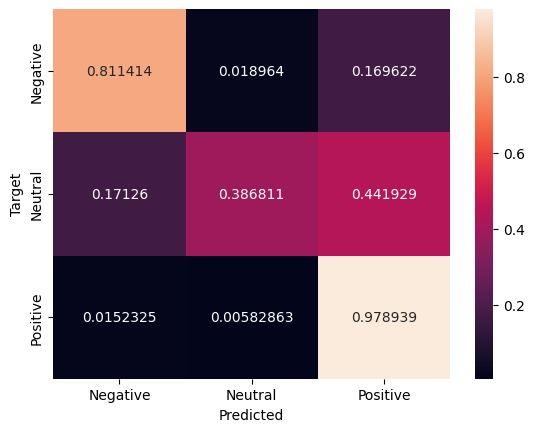

In [247]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [224]:
print(classification_report(y_test,y_lr3))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      5695
           1       0.72      0.39      0.50      2032
           2       0.95      0.98      0.96     33284

    accuracy                           0.93     41011
   macro avg       0.84      0.73      0.76     41011
weighted avg       0.92      0.93      0.92     41011



In [227]:
lr3.coef_

array([[-0.36813325,  0.05987682,  0.08248923, ...,  0.22117886,
        -0.22926444, -0.02834966],
       [ 0.06918869, -0.01594793, -0.0117345 , ..., -0.03730896,
         0.1806963 , -0.0124889 ],
       [ 0.29894456, -0.04392889, -0.07075472, ..., -0.1838699 ,
         0.04856814,  0.04083856]])

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 4.0000e+00, 1.5000e+01, 2.5000e+01,
        1.5600e+02, 1.1158e+04, 3.0998e+04, 1.1800e+02, 2.3000e+01,
        1.4000e+01, 8.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-1.22188916e+01, -1.12017815e+01, -1.01846714e+01, -9.16756130e+00,
        -8.15045122e+00, -7.13334113e+00, -6.11623105e+00, -5.09912096e+00,
        -4.08201088e+00, -3.06490079e+00, -2.04779071e+00, -1.03068062e+00,
        -1.35705379e-02,  1.00353955e+00,  2.02064963e+00,  3.03775972e+00,
         4.05486980e+00,  5.07197989e+00,  6.08908997e+00,  7.10620006e+00,
         8.12331014e+00,  9.14042023e+00,  1.01575303e+01,  1.11746404e+01,
         1.21917505e+01,  1.32088606e+01,  1.42259706e+01,  1.52430807e+01,
         1.62601908e+01,  1.72773009e+01,  1.82944110e+01]

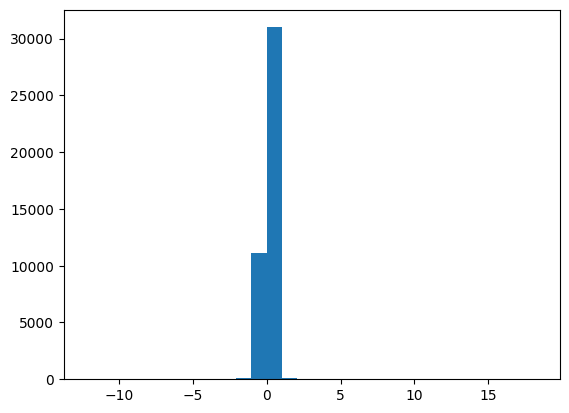

In [228]:
plt.hist(lr3.coef_[2], bins=30)

In [229]:
word_index_map=vectorizer.vocabulary_
word_index_map

{'gifted': 16900,
 'this': 38083,
 'to': 38614,
 'my': 25040,
 'mother': 24751,
 'on': 26328,
 'mothers': 24754,
 'day': 11224,
 'and': 4175,
 'she': 34342,
 'loved': 22701,
 'the': 37863,
 'design': 11937,
 'color': 9436,
 'as': 4631,
 'well': 41299,
 'thank': 37788,
 'you': 42397,
 'flipkart': 15698,
 'np2598wm03': 25889,
 'analog': 4157,
 'watch': 40996,
 'for': 16077,
 'women': 41740,
 'worst': 41999,
 'product': 29724,
 'do': 12735,
 'not': 25747,
 'buy': 7698,
 'it': 20428,
 'very': 40424,
 'cheap': 8700,
 'quality': 31009,
 'rian': 32701,
 'animal': 4214,
 'single': 34731,
 'mink': 23979,
 'blanket': 6718,
 'mild': 23898,
 'winterpolyester': 41642,
 'brown': 7417,
 'grey': 17822,
 'poor': 28740,
 'shf': 34380,
 'velvet': 40333,
 'door': 12820,
 'matmulticolor': 23429,
 'large': 21774,
 'pack': 27154,
 'of': 26044,
 'good': 17101,
 'printing': 29480,
 'outputsmooth': 26957,
 'hp': 19178,
 '46': 2009,
 'black': 6679,
 'ink': 19844,
 'cartridge': 8259,
 'there': 37927,
 'is': 20299

In [231]:
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr3.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
my 1.3512295817831486
and 2.686663461735613
loved 4.853549387818182
well 3.519901564607455
thank 4.744000198963383
you 1.0908565431415882
flipkart 1.411466805479028
for 2.0137699525213795
product 1.5572874570964295
it 1.7318193793551873
good 18.29441098802331
proper 1.4059432084781451
fit 1.4429415739964402
best 10.095565996326357
nice 17.668962013348775
flexible 1.3164991917047695
fast 2.2273685748831245
impressed 1.32254195134912
value 5.7108186922646444
easy 3.751248325568372
price 1.147949033261331
super 10.867689887455096
excellent 8.97031606693259
smart 1.5512057228515903
although 1.0384944020054268
really 1.0346805152524041
useful 4.8708317425258
your 1.5750646613753216
helpful 2.6820004379152205
amezing 1.602598762057957
superb 6.731183798365559
better 4.149446709522458
purchase 1.2399673317087787
these 1.140050864681783
am 1.1419691512881571
perfect 5.1251836330947445
satisfied 3.76303557026063
like 3.780174103168543
top 1.4143708509937536
awesome 9.488193

In [232]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr3.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
worst -6.412917320593114
not -12.218891555104959
cheap -2.9205639165699644
poor -6.5409421467754045
no -4.092735736870974
doesnt -4.150507112884438
average -4.55254621995698
3d -1.2202941771664315
thin -2.1723748139903334
ok -1.9147281790946589
model -1.0919078417819867
waist -1.726249688606795
size -1.1627312836186205
less -1.0279239911064646
but -3.176625654966218
waste -3.524636668432318
upset -1.269090801756448
homes -1.200640957766945
down -1.2180955819452632
too -1.6591050524395092
small -3.405310911077479
bad -3.9500589955471153
after -1.8563318895390832
old -1.8800526102940975
streaming -1.0765945224369797
wash -1.0075512619952334
demo -1.3258273280783017
normal -1.7172403732485322
only -1.3525049491265166
when -1.3705543737947181
pin -1.39493905827925
broke -2.463202856402274
never -2.4037602895082033
class -1.1234071517256616
heat -1.9889164068466494
months -1.30029963048176
pearl -1.2962755391853218
okay -1.3928785642112025
difficult -3.9014183787307095


# LogisticRegression_Tfidfvectorizer_char_tokenizer

In [253]:
vectorizer=TfidfVectorizer(analyzer='char')

In [254]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [255]:
lr4=LogisticRegression(max_iter=4000)

In [256]:
lr4.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [257]:
lr4_test=lr4.score(X_test,y_test)

In [258]:
lr4_train=lr4.score(X_train,y_train)

In [259]:
model_result=(['LR Word Count_Vec',lr_test,lr_train],
              ['LR Char Count_Vec',lr2_test,lr2_train],
              ['NB Word Count_Vec',nb_test,nb_train],
              ['LR Word Tfidf_Vec',lr3_test,lr3_train],
              ['LR Char Tfidf_Vec',lr4_test,lr4_train])

In [260]:
model_result

(['LR Word Count_Vec', 0.9305064494891614, 0.9546454849702208],
 ['LR Char Count_Vec', 0.8090999975616298, 0.8108521650075287],
 ['NB Word Count_Vec', 0.8408719611811465, 0.8465139812607824],
 ['LR Word Tfidf_Vec', 0.9263368364585112, 0.9352052230844727],
 ['LR Char Tfidf_Vec', 0.812294262514935, 0.8138514151949817])

In [261]:
y_lr4=lr4.predict(X_test)

In [262]:
cm=confusion_matrix(y_test,y_lr4,normalize='true')
cm

array([[2.82704126e-02, 0.00000000e+00, 9.71729587e-01],
       [1.32874016e-02, 4.92125984e-04, 9.86220472e-01],
       [3.99591395e-03, 0.00000000e+00, 9.96004086e-01]])

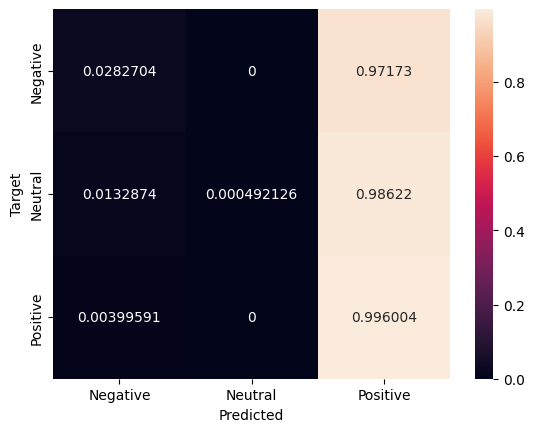

In [263]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [265]:
print(classification_report(y_test,y_lr4))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05      5695
           1       1.00      0.00      0.00      2032
           2       0.81      1.00      0.90     33284

    accuracy                           0.81     41011
   macro avg       0.77      0.34      0.32     41011
weighted avg       0.78      0.81      0.73     41011



In [266]:
lr4.coef_

array([[ 3.1293712 , -0.26061347, -0.34044796, -2.32423314,  0.44938792,
         0.87772242,  0.87772242, -1.04713527,  0.43824629,  0.43934211,
         1.16201642,  0.52689634,  0.3263778 , -0.52547656, -0.6883203 ,
        -1.10115428,  1.07650497,  0.34639381,  0.08819693,  0.25512774,
        -0.01034261, -0.1115398 ,  3.86812895,  1.43992546,  0.9324743 ,
         0.9324743 ,  2.85835477,  0.99067073,  2.44051135,  0.10813577,
         1.85625133,  0.82765306, -0.06228256, -2.00307216,  0.29880169,
        -0.88806779,  0.88303666, -1.75857878, -0.09097289,  0.27765087,
         2.957809  ,  1.45569205,  1.05413929,  5.57504472,  1.34977455,
         0.47957341,  2.83298423, -2.34128477,  0.78679931,  1.06608642,
        -0.74631097,  1.10563174, -1.09662317,  1.49804545,  1.16439275,
         0.37948672, -0.68774524,  2.52084233, -0.23318232,  0.09856305,
        -0.6992256 ,  0.09856305,  1.16439275,  0.26073455,  0.37948672,
         1.62854763, -0.6992256 ],
       [-1.39319

(array([1., 1., 0., 0., 0., 2., 0., 1., 2., 2., 1., 1., 1., 7., 4., 4., 6.,
        9., 6., 3., 4., 2., 3., 1., 2., 1., 0., 1., 1., 1.]),
 array([-3.39883732, -3.2058656 , -3.01289387, -2.81992215, -2.62695043,
        -2.43397871, -2.24100699, -2.04803526, -1.85506354, -1.66209182,
        -1.4691201 , -1.27614837, -1.08317665, -0.89020493, -0.69723321,
        -0.50426149, -0.31128976, -0.11831804,  0.07465368,  0.2676254 ,
         0.46059712,  0.65356885,  0.84654057,  1.03951229,  1.23248401,
         1.42545574,  1.61842746,  1.81139918,  2.0043709 ,  2.19734262,
         2.39031435]),
 <BarContainer object of 30 artists>)

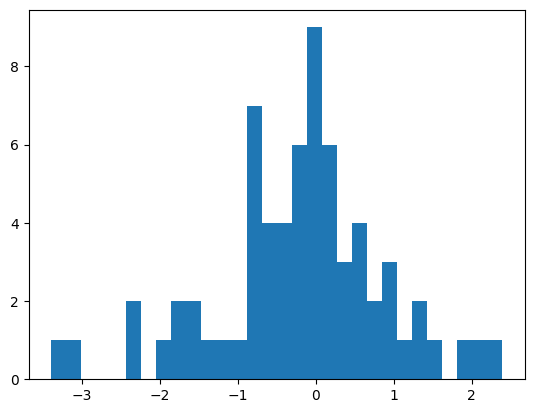

In [267]:
plt.hist(lr4.coef_[2], bins=30)

In [268]:
word_index_map=vectorizer.vocabulary_
word_index_map

{'i': 35,
 ' ': 0,
 'g': 33,
 'f': 32,
 't': 46,
 'e': 31,
 'd': 30,
 'h': 34,
 's': 45,
 'o': 41,
 'm': 39,
 'y': 51,
 'r': 44,
 'n': 40,
 'a': 27,
 'l': 38,
 'v': 48,
 'c': 29,
 'w': 49,
 'k': 37,
 'u': 47,
 'p': 42,
 '2': 14,
 '5': 17,
 '9': 21,
 '8': 20,
 '0': 12,
 '3': 15,
 '-': 9,
 'b': 28,
 'q': 43,
 '4': 16,
 '6': 18,
 'x': 50,
 '7': 19,
 '?': 23,
 '(': 5,
 ')': 6,
 '1': 13,
 'z': 52,
 ',': 8,
 'ã': 62,
 '\x82': 54,
 'â': 61,
 '\xa0': 59,
 'j': 36,
 'ð': 63,
 '\x93': 57,
 'ó': 66,
 '®': 60,
 '\x92': 56,
 'ò': 65,
 '|': 53,
 ':': 22,
 '.': 10,
 '&': 3,
 '/': 11,
 '\x9d': 58,
 '+': 7,
 "'": 4,
 '_': 26,
 '%': 2,
 '[': 24,
 ']': 25,
 '"': 1,
 'ñ': 64,
 '\x91': 55}

In [271]:
threshold = -1

print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr4.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
i 0.7582800833939264
g 2.390314346456554
f 0.5475124817267338
e 0.22544126255406244
d 1.3193418762863358
h -0.1428992285192179
s -0.6620442695631271
o -0.9949298791404684
m -0.5928507917344678
y 0.8700394816497182
r -0.8833329986934629
a -0.8896128361658331
l 0.3576277364953075
v -0.7560026084441855
c 1.8626127222598303
w 0.027697647500980787
u 2.1961881244672554
p 1.3077914457945394
2 0.9638694911411105
5 -0.2480287465748263
9 0.21537567738955135
8 -0.05831248334471622
0 0.5753045079379852
3 1.2098896383711675
- -0.2055796257507921
6 -0.7010871747813686
x -0.5005009600005719
7 0.7105993594760441
? -0.3474771506923977
( -0.10298077166484908
) -0.10298077166484908
1 0.6275980050908321
z 0.06521163441752158
, -0.7195000532304227
ã -0.08075951926845858
 -0.08075951926845858
â 0.2490680384711512
  0.2490680384711512
j -0.4464172075977082
ð -0.10147139799688999
 -0.6620549515633481
ó 0.38392743611901303
® 0.38392743611901303
 0.0582768031620899
ò -0.821574669332663
|

In [272]:
threshold = -1
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr4.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
i 0.7582800833939264
  -1.7361748138534574
f 0.5475124817267338
t -2.263748312954216
e 0.22544126255406244
h -0.1428992285192179
s -0.6620442695631271
o -0.9949298791404684
m -0.5928507917344678
y 0.8700394816497182
r -0.8833329986934629
n -1.4599955262620599
a -0.8896128361658331
l 0.3576277364953075
v -0.7560026084441855
w 0.027697647500980787
k -1.785383425803932
2 0.9638694911411105
5 -0.2480287465748263
9 0.21537567738955135
8 -0.05831248334471622
0 0.5753045079379852
- -0.2055796257507921
b -1.8874870821469503
q -3.1713032115407227
4 -1.1625539167780077
6 -0.7010871747813686
x -0.5005009600005719
7 0.7105993594760441
? -0.3474771506923977
( -0.10298077166484908
) -0.10298077166484908
1 0.6275980050908321
z 0.06521163441752158
, -0.7195000532304227
ã -0.08075951926845858
 -0.08075951926845858
â 0.2490680384711512
  0.2490680384711512
j -0.4464172075977082
ð -0.10147139799688999
 -0.6620549515633481
ó 0.38392743611901303
® 0.38392743611901303
 0.058276803162

# MultinomialNB_Tfidfvectorizer_word_tokenizer

In [315]:
vectorizer=TfidfVectorizer(analyzer='word')

In [316]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [317]:
nb1=MultinomialNB()

In [318]:
nb1.fit(X_train,y_train)

MultinomialNB()

In [319]:
nb1_test=nb1.score(X_test,y_test)

In [320]:
nb1_train=nb1.score(X_train,y_train)

In [321]:
model_result=(['LR Word Count_Vec',lr_test,lr_train],
              ['LR Char Count_Vec',lr2_test,lr2_train],
              ['NB Word Count_Vec',nb_test,nb_train],
              ['LR Word Tfidf_Vec',lr3_test,lr3_train],
              ['LR Char Tfidf_Vec',lr4_test,lr4_train],
              ['NB Word Tfidf_Vec',nb1_test,nb1_train])

In [322]:
model_result

(['LR Word Count_Vec', 0.9305064494891614, 0.9546454849702208],
 ['LR Char Count_Vec', 0.8090999975616298, 0.8108521650075287],
 ['NB Word Count_Vec', 0.8408719611811465, 0.8465139812607824],
 ['LR Word Tfidf_Vec', 0.9263368364585112, 0.9352052230844727],
 ['LR Char Tfidf_Vec', 0.812294262514935, 0.8138514151949817],
 ['NB Word Tfidf_Vec', 0.8358976859866865, 0.8413994062459995])

In [323]:
y_nb1=nb1.predict(X_test)

In [324]:
cm=confusion_matrix(y_test,y_nb1,normalize='true')
cm

array([[2.29323968e-01, 0.00000000e+00, 7.70676032e-01],
       [4.33070866e-02, 4.92125984e-04, 9.56200787e-01],
       [9.28373994e-03, 3.00444658e-05, 9.90686216e-01]])

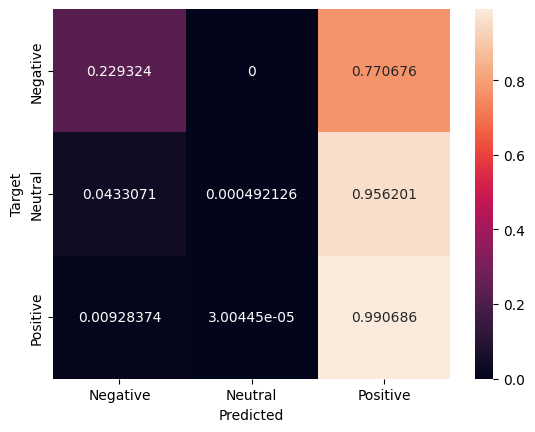

In [325]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [326]:
print(classification_report(y_test,y_nb1))

              precision    recall  f1-score   support

           0       0.77      0.23      0.35      5695
           1       0.50      0.00      0.00      2032
           2       0.84      0.99      0.91     33284

    accuracy                           0.84     41011
   macro avg       0.70      0.41      0.42     41011
weighted avg       0.81      0.84      0.79     41011



In [327]:
nb1.feature_log_prob_

array([[ -9.96783068, -11.46921582, -11.65214187, ..., -10.28440348,
        -11.80313656, -11.80313656],
       [-10.18744508, -11.18788181, -11.18788181, ..., -10.86588938,
        -10.81080988, -11.18788181],
       [ -9.36270824, -13.19867265, -13.19867265, ..., -10.54944689,
        -11.64879919, -12.83398505]])

(array([2.1209e+04, 1.1303e+04, 2.6780e+03, 1.3860e+03, 8.9300e+02,
        6.5800e+02, 5.3300e+02, 4.1200e+02, 3.6900e+02, 3.7700e+02,
        3.6600e+02, 3.1700e+02, 2.9800e+02, 2.8300e+02, 2.7000e+02,
        1.9800e+02, 2.1100e+02, 1.3300e+02, 1.1500e+02, 1.4700e+02,
        1.4500e+02, 1.0000e+02, 4.5000e+01, 2.9000e+01, 2.8000e+01,
        1.0000e+01, 1.4000e+01, 2.0000e+00, 5.0000e+00, 4.0000e+00]),
 array([-13.19867265, -12.90970787, -12.6207431 , -12.33177832,
        -12.04281354, -11.75384876, -11.46488398, -11.17591921,
        -10.88695443, -10.59798965, -10.30902487, -10.02006009,
         -9.73109531,  -9.44213054,  -9.15316576,  -8.86420098,
         -8.5752362 ,  -8.28627142,  -7.99730664,  -7.70834187,
         -7.41937709,  -7.13041231,  -6.84144753,  -6.55248275,
         -6.26351798,  -5.9745532 ,  -5.68558842,  -5.39662364,
         -5.10765886,  -4.81869408,  -4.52972931]),
 <BarContainer object of 30 artists>)

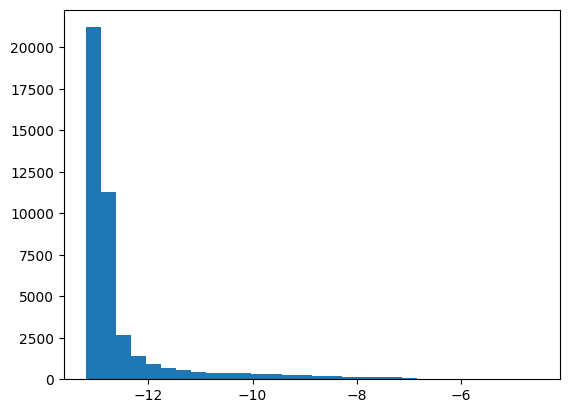

In [328]:
plt.hist(nb1.feature_log_prob_[2], bins=30)

In [330]:
word_index_mapping=vectorizer.vocabulary_
word_index_map

{'i': 35,
 ' ': 0,
 'g': 33,
 'f': 32,
 't': 46,
 'e': 31,
 'd': 30,
 'h': 34,
 's': 45,
 'o': 41,
 'm': 39,
 'y': 51,
 'r': 44,
 'n': 40,
 'a': 27,
 'l': 38,
 'v': 48,
 'c': 29,
 'w': 49,
 'k': 37,
 'u': 47,
 'p': 42,
 '2': 14,
 '5': 17,
 '9': 21,
 '8': 20,
 '0': 12,
 '3': 15,
 '-': 9,
 'b': 28,
 'q': 43,
 '4': 16,
 '6': 18,
 'x': 50,
 '7': 19,
 '?': 23,
 '(': 5,
 ')': 6,
 '1': 13,
 'z': 52,
 ',': 8,
 'ã': 62,
 '\x82': 54,
 'â': 61,
 '\xa0': 59,
 'j': 36,
 'ð': 63,
 '\x93': 57,
 'ó': 66,
 '®': 60,
 '\x92': 56,
 'ò': 65,
 '|': 53,
 ':': 22,
 '.': 10,
 '&': 3,
 '/': 11,
 '\x9d': 58,
 '+': 7,
 "'": 4,
 '_': 26,
 '%': 2,
 '[': 24,
 ']': 25,
 '"': 1,
 'ñ': 64,
 '\x91': 55}

In [313]:
threshold = -12

print("Most positive words:")
for word, index in word_index_map.items():
    weight = nb1.feature_log_prob_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
i -9.320484579689872
  -9.362708235705302
n -9.917932796037029
a -9.68522794338673
v -10.434239604667136
2 -11.385577365576076
9 -11.132542766764853
0 -10.040355256915362
( -9.979182765557521
) -10.554718670476687
 -6.502420761868469
 -7.235909079310762
 -7.316101812335071
' -10.652788169031577
 -7.710489452151213


In [314]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = nb1.feature_log_prob_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
i -9.320484579689872
  -9.362708235705302
g -12.831340389855946
f -12.911272077903545
t -12.978173023845262
e -13.04419995736134
d -13.018560967789089
h -12.946942574071484
s -13.198672652732379
o -12.946942574071484
m -12.946942574071484
y -13.198672652732379
r -12.946942574071484
n -9.917932796037029
a -9.68522794338673
l -12.900080257057045
v -10.434239604667136
c -12.95561833598866
w -13.03483964218391
k -13.033311450708672
u -12.927382360863954
p -12.946942574071484
2 -11.385577365576076
5 -13.018560967789089
9 -11.132542766764853
8 -12.90141186568016
0 -10.040355256915362
3 -12.711983574792248
- -13.198672652732379
b -12.968484345155796
q -12.946942574071484
4 -13.198672652732379
6 -13.198672652732379
x -12.772359747107467
7 -13.009348306823902
? -12.900080257057045
( -9.979182765557521
) -10.554718670476687
1 -13.029870884164838
z -12.877541067196669
, -12.950036777578843
ã -13.198672652732379
 -6.502420761868469
â -12.222535121550148
  -12.926443169849845


# OBSSRVATION ACCORDING TO THIS DATASET


# Logistic Regression works better than Multinomial Nb in Sentiment Analysis(according to this dataset)

# Here CountVectorizer edged out TfidfVectorizer when though TfidfVectorizer is considered superior therotically

# Character Tokenisation(analyzer='char') has no use in Sentiment analysis

# Word Tokenisation(analyzer='word') has better role than Character Tokensation


# Can use Lemattization and PorterStemmer and stopword removal(stop_word='english)(check Sentiment_Analysis_TfidfVectorizer_my_work notebook for for details)
